# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Athallah Naufal Muthahhari
- **Email:** athallah2100@gmail.com
- **ID Dicoding:** MC179D5Y0995

## Menentukan Pertanyaan Bisnis

- Apakah faktor hari kerja/libur lebih berpengaruh dibandingkan cuaca dalam menentukan jumlah peminjaman sepeda?
- Bagaimana efektivitas sistem bike-sharing pada hari libur dibandingkan hari kerja?
- Apakah pengguna registered dan casual memiliki pola peminjaman yang berbeda sepanjang minggu?
- Hari apa dalam seminggu yang paling sering digunakan untuk meminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [267]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Athallah22/Data-Collection/refs/heads/main/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [268]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Athallah22/Data-Collection/refs/heads/main/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset Day.csv
  1. Peminjaman tertinggi terjadi di musim panas (season = 2) dan musim gugur (season = 3).
  2. Akhir pekan cenderung memiliki peminjaman yang lebih merata sepanjang hari, sedangkan hari kerja memiliki lonjakan pada pagi dan sore hari.
  3. Orang cenderung menghindari bersepeda saat udara terasa lembap.

---
- Dataset Hour.csv
  1. Akhir pekan memiliki pola peminjaman yang lebih merata sepanjang hari.
  2. Suhu tinggi meningkatkan peminjaman sepeda, tetapi jika terlalu panas, jumlah peminjaman mulai menurun.
  3. Jam dengan peminjaman tertinggi:
    - 07:00 - 09:00 (jam berangkat kerja).
    - 17:00 - 19:00 (jam pulang kerja).

### Assessing Data

Melakukan penliaian table day_df

In [269]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [270]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [271]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [272]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Hasil penilaian menunjukan tidak ada indikasi data kosong, dan tidak ada data yang duplikasi

In [273]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Jam sibuk kemungkinan besar terjadi di pagi hari (orang berangkat kerja) dan sore/malam hari (orang pulang kerja).
- Sebagian besar peminjaman terjadi di hari kerja.
- Sebagian besar peminjam adalah pengguna terdaftar dibandingkan pengguna casual.

Penilaian table hour_df

In [274]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [275]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [276]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [277]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight**

Hasil penilaian tidak menunjukan data hilang atau data yang terduplikasi

In [278]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**
- Distribusi antar musim relatif merata karena standar deviasi (std) = 1.10.
- Rata-rata mnth = 6.54, menunjukan data lebih condong ke pertengahan tahun.

### Cleaning Data

Mengubah fitur yang disingkat pada `day_df` agar lebih mudah dibaca

In [279]:
day_df = day_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'workingday': 'working_day', 'weathersit': 'weather_condition','cnt': 'total_rentals'})
day_df

,instant,date,season,year,month,holiday,weekday,working_day,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Mengubah fitur pada `hour_df` yang disingkat agar lebih mudah dibaca

In [280]:
hour_df = hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'hum': 'humidity', 'workingday': 'working_day', 'weathersit': 'weather_condition','cnt': 'total_rentals'})
hour_df

,instant,date,season,year,month,hour,holiday,weekday,working_day,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore `day_df`

Menampilkan fitur yang diperlukan

In [281]:
selected_features = ['date', 'season', 'holiday', 'weekday', 'working_day', 'weather_condition', 'registered', 'casual', 'total_rentals']
day_df = day_df[selected_features]
day_df

,date,season,holiday,weekday,working_day,weather_condition,registered,casual,total_rentals
0,2011-01-01,1,0,6,0,2,654,331,985
1,2011-01-02,1,0,0,0,2,670,131,801
2,2011-01-03,1,0,1,1,1,1229,120,1349
3,2011-01-04,1,0,2,1,1,1454,108,1562
4,2011-01-05,1,0,3,1,1,1518,82,1600
...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,4,1,2,1867,247,2114
727,2012-12-28,1,0,5,1,2,2451,644,3095
728,2012-12-29,1,0,6,0,2,1182,159,1341
729,2012-12-30,1,0,0,0,1,1432,364,1796


In [282]:
print("\nStatistik Deskriptif Data Numerik:")
day_df.describe()


Statistik Deskriptif Data Numerik:


,date,season,holiday,weekday,working_day,weather_condition,registered,casual,total_rentals
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.028728,2.997264,0.683995,1.395349,3656.172367,848.176471,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,1.000000,0.000000,1.000000,2497.000000,315.500000,3152.000000
50%,2012-01-01 00:00:00,3.000000,0.000000,3.000000,1.000000,1.000000,3662.000000,713.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,0.000000,5.000000,1.000000,2.000000,4776.500000,1096.000000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,6.000000,1.000000,3.000000,6946.000000,3410.000000,8714.000000
std,NaN,1.110807,0.167155,2.004787,0.465233,0.544894,1560.256377,686.622488,1937.211452


In [283]:
categorical_cols = ['season', 'holiday', 'weekday', 'working_day', 'weather_condition']
for col in categorical_cols:
    print(f"\nDistribusi Data untuk '{col}':")
    print(day_df[col].value_counts())


Distribusi Data untuk 'season':
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi Data untuk 'holiday':
holiday
0    710
1     21
Name: count, dtype: int64

Distribusi Data untuk 'weekday':
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

Distribusi Data untuk 'working_day':
working_day
1    500
0    231
Name: count, dtype: int64

Distribusi Data untuk 'weather_condition':
weather_condition
1    463
2    247
3     21
Name: count, dtype: int64


(Data dalam bentuk hari)

**Insight:**
- Data season dan weekday relatif seimbang
- Data holiday dan workingday cukup timpang (hari libur sangat sedikit)
- Data weathersit menunjukkan cuaca ekstrem (hujan/salju ringan) jarang terjadi

In [284]:
corr_matrix = day_df.corr()
print("\nKorelasi dengan Total Peminjam:")
print(corr_matrix['total_rentals'].sort_values(ascending=False))


Korelasi dengan Total Peminjam:
total_rentals        1.000000
registered           0.945517
casual               0.672804
date                 0.628830
season               0.406100
weekday              0.067443
working_day          0.061156
holiday             -0.068348
weather_condition   -0.297391
Name: total_rentals, dtype: float64


Setelah menghitung fitur mana yang paling berpengaruh, didapatkan hasil seperti berikut:
-  Faktor utama yang memperngaruhi total peminjam adalah **registered** yang menempati posisi pertama.
- weather_condition memiliki dampak negatif pada peminjaman, semakin buruk cuacanya, semakin sedikit peminjaman, sebab ia berada di posisi terakhir.
- Hari kerja, hari libur, dan hari dalam seminggu hampir tidak berpengaruh signifikan terhadap jumlah peminjaman.
- season memiliki sedikit pengaruh terhadap jumlah peminjaman, yang mungkin disebabkan oleh perubahan cuaca atau kebiasaan masyarakat.

### Explor `hour_df`

Memilih fitur yang diperlukan

In [285]:
selected_features = ['date', 'hour', 'season', 'holiday', 'weekday', 'working_day', 'weather_condition', 'registered', 'casual', 'total_rentals']
hour_df = hour_df[selected_features]
hour_df

,date,hour,season,holiday,weekday,working_day,weather_condition,registered,casual,total_rentals
0,2011-01-01,0,1,0,6,0,1,13,3,16
1,2011-01-01,1,1,0,6,0,1,32,8,40
2,2011-01-01,2,1,0,6,0,1,27,5,32
3,2011-01-01,3,1,0,6,0,1,10,3,13
4,2011-01-01,4,1,0,6,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,19,1,0,1,1,2,108,11,119
17375,2012-12-31,20,1,0,1,1,2,81,8,89
17376,2012-12-31,21,1,0,1,1,1,83,7,90
17377,2012-12-31,22,1,0,1,1,1,48,13,61


In [286]:
hour_df = hour_df.groupby('date').agg(
    season=('season', 'first'),
    holiday=('holiday', 'first'),
    weekday=('weekday', 'first'),
    working_day=('working_day', 'first'),
    weather_condition=('weather_condition', 'median'),
    total_registered=('registered', 'sum'),
    total_casual=('casual', 'sum'),
    total_rentals=('total_rentals', 'sum'),
    hourly_peak_registered=('registered', lambda x: x.idxmax() % 24),
    hourly_peak_casual=('casual', lambda x: x.idxmax() % 24),
    hourly_peak_total=('total_rentals', lambda x: x.idxmax() % 24),
    avg_rentals_per_hour=('total_rentals', 'mean')
).reset_index()

hour_df


,date,season,holiday,weekday,working_day,weather_condition,total_registered,total_casual,total_rentals,hourly_peak_registered,hourly_peak_casual,hourly_peak_total,avg_rentals_per_hour
0,2011-01-01,1,0,6,0,1.5,654,331,985,14,13,15,41.041667
1,2011-01-02,1,0,0,0,2.0,670,131,801,11,11,11,34.826087
2,2011-01-03,1,0,1,1,1.0,1229,120,1349,5,12,14,61.318182
3,2011-01-04,1,0,2,1,1.0,1454,108,1562,13,9,13,67.913043
4,2011-01-05,1,0,3,1,1.0,1518,82,1600,3,6,3,69.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,4,1,2.0,1867,247,2114,20,18,20,88.083333
727,2012-12-28,1,0,5,1,2.0,2451,644,3095,11,17,20,128.958333
728,2012-12-29,1,0,6,0,2.0,1182,159,1341,19,19,19,55.875000
729,2012-12-30,1,0,0,0,1.0,1432,364,1796,17,16,16,74.833333


Agregasi dilakukan karena kita akan menggabungkan day_df dan hour_df menjadi satu dataset yang digunakan untuk menjawab semua pertanyaan, hingga hour_df yang satuan awalnya jam, berubah menjadi hari

In [287]:
categorical_cols = ['season', 'holiday', 'weekday', 'working_day', 'weather_condition']

for col in categorical_cols:
    print(f"\nDistribusi Data untuk '{col}':")
    print(hour_df[col].value_counts())


Distribusi Data untuk 'season':
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi Data untuk 'holiday':
holiday
0    710
1     21
Name: count, dtype: int64

Distribusi Data untuk 'weekday':
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

Distribusi Data untuk 'working_day':
working_day
1    500
0    231
Name: count, dtype: int64

Distribusi Data untuk 'weather_condition':
weather_condition
1.0    487
2.0    190
1.5     28
3.0     23
2.5      3
Name: count, dtype: int64


Karena sudah mengalami agregasi, maka satuan data berubah menjadi hari agar sesuai dengan day_df

**Insight**

- Dataset cukup seimbang dalam hal musim dan hari dalam seminggu.
- Jumlah hari libur (21 hari) dan hari dengan hujan (23 hari) sangat sedikit, sehingga analisis tentang dampaknya harus dilakukan dengan hati-hati agar tidak bias.
- Hari kerja lebih banyak dibanding hari libur/akhir pekan, yang mungkin menyebabkan pola peminjaman lebih mencerminkan kebiasaan pengguna di hari kerja.
- Cuaca cerah dan mendung mendominasi dataset, sedangkan data hujan sangat sedikit, yang bisa membatasi kesimpulan tentang dampak cuaca buruk terhadap peminjaman sepeda.

In [288]:
corr_matrix = hour_df.corr()
print("\nKorelasi dengan Total Peminjam:")
print(corr_matrix['total_rentals'].sort_values(ascending=False))


Korelasi dengan Total Peminjam:
total_rentals             1.000000
avg_rentals_per_hour      0.998683
total_registered          0.945517
total_casual              0.672804
date                      0.628830
season                    0.406100
weekday                   0.067443
working_day               0.061156
hourly_peak_casual       -0.067837
holiday                  -0.068348
hourly_peak_total        -0.094070
hourly_peak_registered   -0.157255
weather_condition        -0.310900
Name: total_rentals, dtype: float64


**Insight**

- Jumlah peminjaman paling dipengaruhi oleh pengguna terdaftar.
- Jumlah peminjaman meningkat seiring waktu, mungkin karena layanan semakin populer.
- Musim memiliki sedikit pengaruh, tetapi tidak dominan.
- Cuaca buruk mengurangi jumlah peminjaman lebih dari faktor lainnya.
- Hari dalam seminggu, hari kerja vs. libur, dan jam puncak tidak terlalu berpengaruh.

### Explore semua data

Hubungkan semua data

In [289]:
all_df = pd.merge(day_df, hour_df, on='date', how='inner')
all_df

,date,season_x,holiday_x,weekday_x,working_day_x,weather_condition_x,registered,casual,total_rentals_x,season_y,...,weekday_y,working_day_y,weather_condition_y,total_registered,total_casual,total_rentals_y,hourly_peak_registered,hourly_peak_casual,hourly_peak_total,avg_rentals_per_hour
0,2011-01-01,1,0,6,0,2,654,331,985,1,...,6,0,1.5,654,331,985,14,13,15,41.041667
1,2011-01-02,1,0,0,0,2,670,131,801,1,...,0,0,2.0,670,131,801,11,11,11,34.826087
2,2011-01-03,1,0,1,1,1,1229,120,1349,1,...,1,1,1.0,1229,120,1349,5,12,14,61.318182
3,2011-01-04,1,0,2,1,1,1454,108,1562,1,...,2,1,1.0,1454,108,1562,13,9,13,67.913043
4,2011-01-05,1,0,3,1,1,1518,82,1600,1,...,3,1,1.0,1518,82,1600,3,6,3,69.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,4,1,2,1867,247,2114,1,...,4,1,2.0,1867,247,2114,20,18,20,88.083333
727,2012-12-28,1,0,5,1,2,2451,644,3095,1,...,5,1,2.0,2451,644,3095,11,17,20,128.958333
728,2012-12-29,1,0,6,0,2,1182,159,1341,1,...,6,0,2.0,1182,159,1341,19,19,19,55.875000
729,2012-12-30,1,0,0,0,1,1432,364,1796,1,...,0,0,1.0,1432,364,1796,17,16,16,74.833333


In [290]:
hourly_sum = all_df.groupby('date')['total_rentals_x'].sum().reset_index()
daily_total = all_df[['date', 'total_rentals_y']].drop_duplicates()
comparison_df = pd.merge(hourly_sum, daily_total, on='date', how='inner')
comparison_df['difference'] = (comparison_df['total_rentals_x'] - comparison_df['total_rentals_y']).abs()

total_discrepancy = comparison_df['difference'].sum()
print(f"Total perbedaan antara hourly sum dan daily total: {total_discrepancy}")

Total perbedaan antara hourly sum dan daily total: 0


In [291]:
print("Cek kesamaan nilai antara kolom duplikat:")

print("season_x == season_y:", (all_df['season_x'] == all_df['season_y']).all())
print("holiday_x == holiday_y:", (all_df['holiday_x'] == all_df['holiday_y']).all())
print("weekday_x == weekday_y:", (all_df['weekday_x'] == all_df['weekday_y']).all())
print("working_day_x == working_day_y:", (all_df['working_day_x'] == all_df['working_day_y']).all())
print("weather_condition_x == weather_condition_y:", (all_df['weather_condition_x'] == all_df['weather_condition_y']).all())
print("total_rentals_x == total_rentals_y:", (all_df['total_rentals_x'] == all_df['total_rentals_y']).all())

Cek kesamaan nilai antara kolom duplikat:
season_x == season_y: True
holiday_x == holiday_y: True
weekday_x == weekday_y: True
working_day_x == working_day_y: True
weather_condition_x == weather_condition_y: False
total_rentals_x == total_rentals_y: True


Karena ada beberapa fitur yang memiliki persamaan, maka kita drop salah satu fitur

In [292]:
all_df.drop(columns=['season_y', 'holiday_y', 'weekday_y', 'working_day_y', 'weather_condition_y', 'total_rentals_y'], inplace=True)

Setelah fitur yang sama didrop, maka kita ubah nama fitur yang ada "x" agar lebih mudah untuk dipahami

In [293]:
all_df.rename(columns={
    'season_x': 'season',
    'holiday_x': 'holiday',
    'weekday_x': 'weekday',
    'working_day_x': 'working_day',
    'weather_condition_x': 'weather_condition',
    'total_rentals_x': 'total_rentals'
}, inplace=True)
all_df

,date,season,holiday,weekday,working_day,weather_condition,registered,casual,total_rentals,total_registered,total_casual,hourly_peak_registered,hourly_peak_casual,hourly_peak_total,avg_rentals_per_hour
0,2011-01-01,1,0,6,0,2,654,331,985,654,331,14,13,15,41.041667
1,2011-01-02,1,0,0,0,2,670,131,801,670,131,11,11,11,34.826087
2,2011-01-03,1,0,1,1,1,1229,120,1349,1229,120,5,12,14,61.318182
3,2011-01-04,1,0,2,1,1,1454,108,1562,1454,108,13,9,13,67.913043
4,2011-01-05,1,0,3,1,1,1518,82,1600,1518,82,3,6,3,69.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,4,1,2,1867,247,2114,1867,247,20,18,20,88.083333
727,2012-12-28,1,0,5,1,2,2451,644,3095,2451,644,11,17,20,128.958333
728,2012-12-29,1,0,6,0,2,1182,159,1341,1182,159,19,19,19,55.875000
729,2012-12-30,1,0,0,0,1,1432,364,1796,1432,364,17,16,16,74.833333


In [294]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    731 non-null    datetime64[ns]
 1   season                  731 non-null    int64         
 2   holiday                 731 non-null    int64         
 3   weekday                 731 non-null    int64         
 4   working_day             731 non-null    int64         
 5   weather_condition       731 non-null    int64         
 6   registered              731 non-null    int64         
 7   casual                  731 non-null    int64         
 8   total_rentals           731 non-null    int64         
 9   total_registered        731 non-null    int64         
 10  total_casual            731 non-null    int64         
 11  hourly_peak_registered  731 non-null    int64         
 12  hourly_peak_casual      731 non-null    int64     

In [295]:
all_df.describe()

,date,season,holiday,weekday,working_day,weather_condition,registered,casual,total_rentals,total_registered,total_casual,hourly_peak_registered,hourly_peak_casual,hourly_peak_total,avg_rentals_per_hour
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.028728,2.997264,0.683995,1.395349,3656.172367,848.176471,4504.348837,3656.172367,848.176471,12.455540,13.367989,12.801642,188.419241
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,22.000000,20.000000,2.000000,0.000000,0.000000,0.000000,18.375000
25%,2011-07-02 12:00:00,2.000000,0.000000,1.000000,0.000000,1.000000,2497.000000,315.500000,3152.000000,2497.000000,315.500000,8.000000,9.000000,9.000000,132.354167
50%,2012-01-01 00:00:00,3.000000,0.000000,3.000000,1.000000,1.000000,3662.000000,713.000000,4548.000000,3662.000000,713.000000,13.000000,14.000000,13.000000,189.541667
75%,2012-07-01 12:00:00,3.000000,0.000000,5.000000,1.000000,2.000000,4776.500000,1096.000000,5956.000000,4776.500000,1096.000000,18.000000,19.000000,19.000000,249.541667
max,2012-12-31 00:00:00,4.000000,1.000000,6.000000,1.000000,3.000000,6946.000000,3410.000000,8714.000000,6946.000000,3410.000000,23.000000,23.000000,23.000000,363.083333
std,NaN,1.110807,0.167155,2.004787,0.465233,0.544894,1560.256377,686.622488,1937.211452,1560.256377,686.622488,6.094159,6.191467,6.035538,79.977550


In [296]:
group_working_weather = all_df.groupby(['working_day', 'weather_condition'])['total_rentals'].mean().reset_index()
group_working_weather

,working_day,weather_condition,total_rentals
0,0,1,4587.269231
1,0,2,3936.828571
2,0,3,1815.400000
3,1,1,5023.902280
4,1,2,4075.028249
5,1,3,1799.500000


In [297]:
group_working = all_df.groupby('working_day')['total_rentals'].agg(['mean', 'std']).reset_index()
group_working

,working_day,mean,std
0,0,4330.168831,2052.141245
1,1,4584.820000,1878.415583


In [298]:
group_weekday = all_df.groupby('weekday')[['registered', 'casual']].mean().reset_index()
group_weekday

,weekday,registered,casual
0,0,2890.533333,1338.295238
1,1,3663.990476,674.133333
2,2,3954.480769,556.182692
3,3,3997.394231,551.144231
4,4,4076.298077,590.961538
5,5,3938.000000,752.288462
6,6,3085.285714,1465.257143


In [299]:
group_weekly_rentals = all_df.groupby('weekday')['total_rentals'].mean().reset_index()
group_weekly_rentals = group_weekly_rentals.sort_values(by='total_rentals', ascending=False)
group_weekly_rentals

,weekday,total_rentals
5,5,4690.288462
4,4,4667.259615
6,6,4550.542857
3,3,4548.538462
2,2,4510.663462
1,1,4338.123810
0,0,4228.828571


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah faktor hari kerja/libur lebih berpengaruh dibandingkan cuaca dalam menentukan jumlah peminjaman sepeda?

Menyiapkan data yang dibutuhkan

In [300]:
table_working_vs_holiday = all_df.groupby(['working_day'])[['total_rentals']].agg(['mean', 'median', 'std'])
table_working_vs_holiday.columns = ['Mean Rentals', 'Median Rentals', 'Std Dev']
table_working_vs_holiday.index = ['Libur', 'Hari Kerja']
print("\nPerbandingan Peminjaman Sepeda antara Hari Kerja dan Hari Libur:")
print(table_working_vs_holiday)


Perbandingan Peminjaman Sepeda antara Hari Kerja dan Hari Libur:
            Mean Rentals  Median Rentals      Std Dev
Libur        4330.168831          4459.0  2052.141245
Hari Kerja   4584.820000          4582.0  1878.415583


<ipython-input-301-5d0fe72314ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


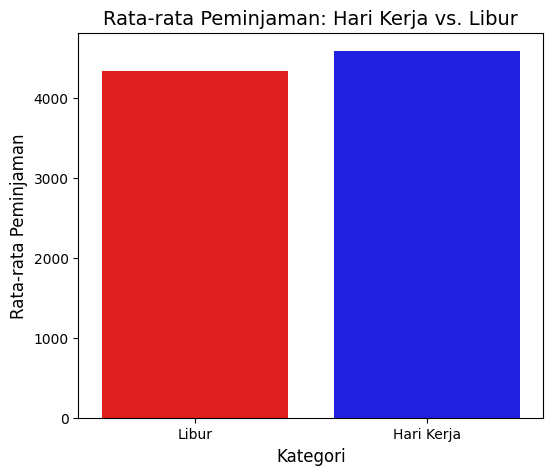

In [301]:
plt.figure(figsize=(6, 5))

sns.barplot(
    x=table_working_vs_holiday.index,
    y=table_working_vs_holiday['Mean Rentals'],
    palette=['red', 'blue']
)

plt.title('Rata-rata Peminjaman: Hari Kerja vs. Libur', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.show()

In [302]:
table_weather_vs_rentals = all_df.groupby(['weather_condition'])[['total_rentals']].agg(['mean', 'median', 'std'])
table_weather_vs_rentals.columns = ['Mean Rentals', 'Median Rentals', 'Std Dev']

print("\n**Perbandingan Peminjaman Sepeda Berdasarkan Cuaca**")
print(table_weather_vs_rentals)


**Perbandingan Peminjaman Sepeda Berdasarkan Cuaca**
                   Mean Rentals  Median Rentals      Std Dev
weather_condition                                           
1                   4876.786177          4844.0  1879.483989
2                   4035.862348          4040.0  1809.109918
3                   1803.285714          1817.0  1240.284449


<ipython-input-303-2f7a76cb4cf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


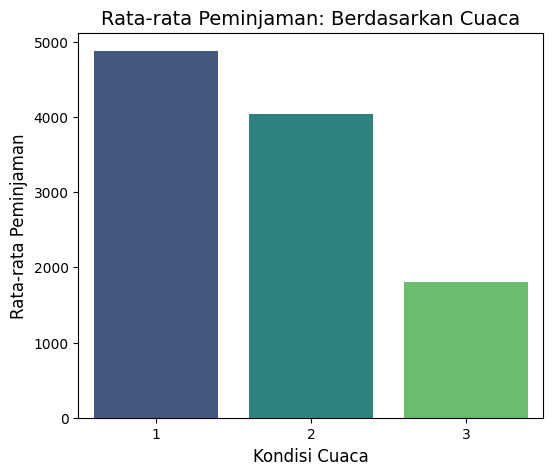

In [303]:
plt.figure(figsize=(6, 5))

sns.barplot(
    x=table_weather_vs_rentals.index,
    y=table_weather_vs_rentals['Mean Rentals'],
    palette='viridis'
)

plt.title('Rata-rata Peminjaman: Berdasarkan Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.show()


In [304]:
bins = [0, 2000, 4500, 6000]
labels = ['Rendah', 'Sedang', 'Tinggi']

all_df['rental_category'] = pd.cut(all_df['total_rentals'], bins=bins, labels=labels)

print("\n**Distribusi Kategori Peminjaman Sepeda:**")
print(all_df['rental_category'].value_counts())


**Distribusi Kategori Peminjaman Sepeda:**
rental_category
Sedang    261
Tinggi    192
Rendah     98
Name: count, dtype: int64


<ipython-input-305-7f5f2288fba2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=all_df['rental_category'], palette='coolwarm')


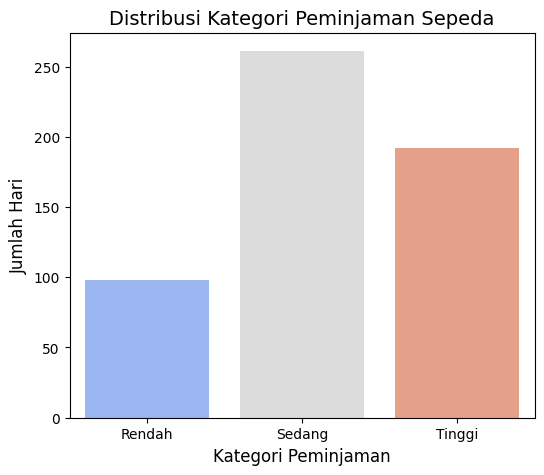

In [305]:
plt.figure(figsize=(6, 5))

# Count plot kategori peminjaman
sns.countplot(x=all_df['rental_category'], palette='coolwarm')

# Labeling
plt.title('Distribusi Kategori Peminjaman Sepeda', fontsize=14)
plt.xlabel('Kategori Peminjaman', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)

# Tampilkan plot
plt.show()

### Pertanyaan 2:

Bagaimana efektivitas sistem bike-sharing pada hari libur dibandingkan hari kerja?

Menyiapkan data yang dibutuhkan

In [306]:
#**Perbandingan Rata-rata Peminjaman pada Hari Kerja vs. Hari Libur**
work_holiday_summary = all_df.groupby('working_day')['total_rentals'].agg(['mean', 'median', 'std'])
work_holiday_summary.index = ['Libur', 'Hari Kerja']
print("\n**Perbandingan Peminjaman Sepeda antara Hari Kerja dan Libur:**")
print(work_holiday_summary)


**Perbandingan Peminjaman Sepeda antara Hari Kerja dan Libur:**
                   mean  median          std
Libur       4330.168831  4459.0  2052.141245
Hari Kerja  4584.820000  4582.0  1878.415583


<ipython-input-307-29795935a2ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_working_vs_holiday.index, y=table_working_vs_holiday['Mean Rentals'], palette=['red', 'blue'])


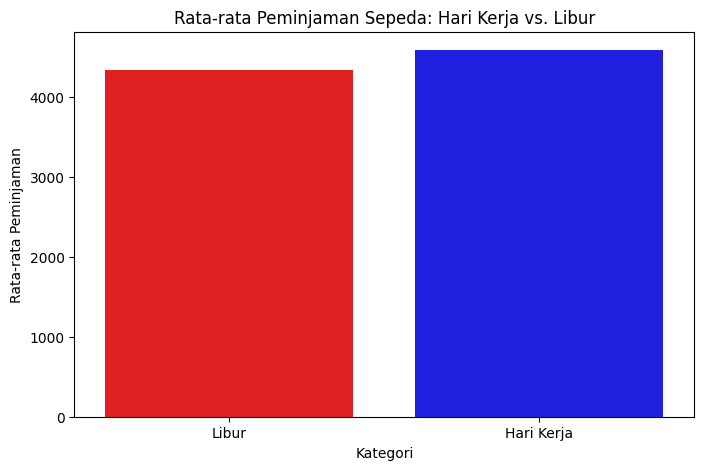

In [307]:
plt.figure(figsize=(8, 5))
sns.barplot(x=table_working_vs_holiday.index, y=table_working_vs_holiday['Mean Rentals'], palette=['red', 'blue'])
plt.title('Rata-rata Peminjaman Sepeda: Hari Kerja vs. Libur')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

In [308]:
user_type_comparison = all_df.groupby(['working_day'])[['total_registered', 'total_casual']].mean()
user_type_comparison.index = ['Libur', 'Hari Kerja']

print("\nPerbandingan Peminjaman: Pengguna Terdaftar vs. Kasual")
print(user_type_comparison)



Perbandingan Peminjaman: Pengguna Terdaftar vs. Kasual
            total_registered  total_casual
Libur            2959.034632   1371.134199
Hari Kerja       3978.250000    606.570000


<Figure size 600x400 with 0 Axes>

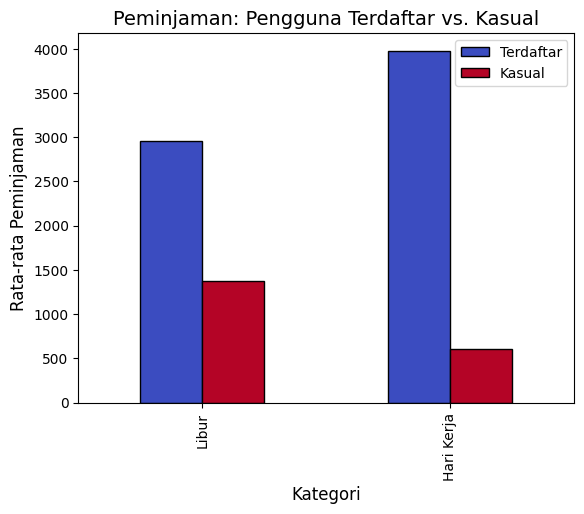

In [309]:
plt.figure(figsize=(6, 4))

user_type_comparison.plot(kind='bar', colormap='coolwarm', edgecolor='black')

plt.title('Peminjaman: Pengguna Terdaftar vs. Kasual', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.legend(['Terdaftar', 'Kasual'])
plt.show()

**Insight**
- Sistem bike-sharing lebih efektif untuk pengguna tetap (terdaftar) sebagai transportasi harian.
- Di hari libur, pengguna kasual meningkat, menandakan adanya segmen rekreasi.
- Strategi bisnis bisa difokuskan pada promosi ke pengguna kasual saat akhir pekan dan meningkatkan layanan bagi pengguna terdaftar di hari kerja.

### Pertanyaan 3:
Apakah pengguna registered dan casual memiliki pola peminjaman yang berbeda sepanjang minggu?

Menyiapkan data yang butuhkan

In [310]:
weekly_rentals = all_df.groupby('weekday')[['total_registered', 'total_casual']].mean()

day_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
weekly_rentals.index = weekly_rentals.index.map(day_mapping)

print("\nRata-rata Peminjaman per Hari dalam Seminggu:")
print(weekly_rentals)


Rata-rata Peminjaman per Hari dalam Seminggu:
         total_registered  total_casual
weekday                                
Senin         2890.533333   1338.295238
Selasa        3663.990476    674.133333
Rabu          3954.480769    556.182692
Kamis         3997.394231    551.144231
Jumat         4076.298077    590.961538
Sabtu         3938.000000    752.288462
Minggu        3085.285714   1465.257143


<Figure size 1000x500 with 0 Axes>

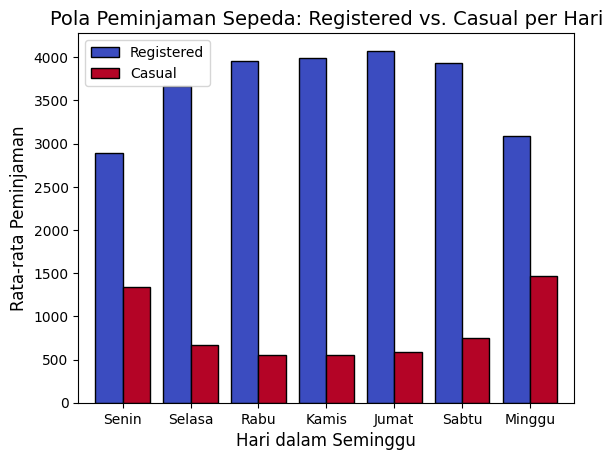

In [311]:
plt.figure(figsize=(10, 5))
ax = weekly_rentals.plot(kind='bar', width=0.8, colormap='coolwarm', edgecolor='black')
ax.set_xticklabels(weekly_rentals.index, rotation=0)
plt.title('Pola Peminjaman Sepeda: Registered vs. Casual per Hari', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.legend(['Registered', 'Casual'], loc='upper left')
plt.show()

**Insight**

1. Pengguna Registered (Terdaftar)
  - Peminjaman sepeda meningkat dari Senin hingga Jumat, dengan puncak pada Kamis dan Jumat (sekitar 4000-an).
  - Pada akhir pekan (Sabtu & Minggu), peminjaman turun secara signifikan.
  - Data ini menunjukkan bahwa pengguna registered menggunakan sepeda sebagai alat transportasi utama selama hari kerja (misalnya untuk ke kantor atau kampus).

2. Pengguna Casual (Tidak Terdaftar)
  - Peminjaman sepeda justru menurun drastis selama hari kerja, terutama pada Selasa hingga Jumat di bawah 600-an.
  - Jumlah peminjaman naik kembali pada Sabtu & Minggu, dengan puncak pada Minggu (sekitar 1500-an).
  - Data ini menunjukkan bahwa pengguna casual lebih sering menggunakan sepeda untuk rekreasi atau aktivitas santai di akhir pekan.


### Pertanyaan 4:

Hari apa dalam seminggu yang paling sering digunakan untuk meminjam sepeda?

Menyiakan data yang dibutuhkan

In [312]:
weekly_total_rentals = all_df.groupby('weekday')['total_rentals'].mean()

day_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
weekly_total_rentals.index = weekly_total_rentals.index.map(day_mapping)

print("\nRata-rata Total Peminjaman Sepeda per Hari dalam Seminggu:")
print(weekly_total_rentals)


Rata-rata Total Peminjaman Sepeda per Hari dalam Seminggu:
weekday
Senin     4228.828571
Selasa    4338.123810
Rabu      4510.663462
Kamis     4548.538462
Jumat     4667.259615
Sabtu     4690.288462
Minggu    4550.542857
Name: total_rentals, dtype: float64


<ipython-input-313-2fedc79c9cc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_total_rentals.index, y=weekly_total_rentals.values, palette='coolwarm', edgecolor='black')


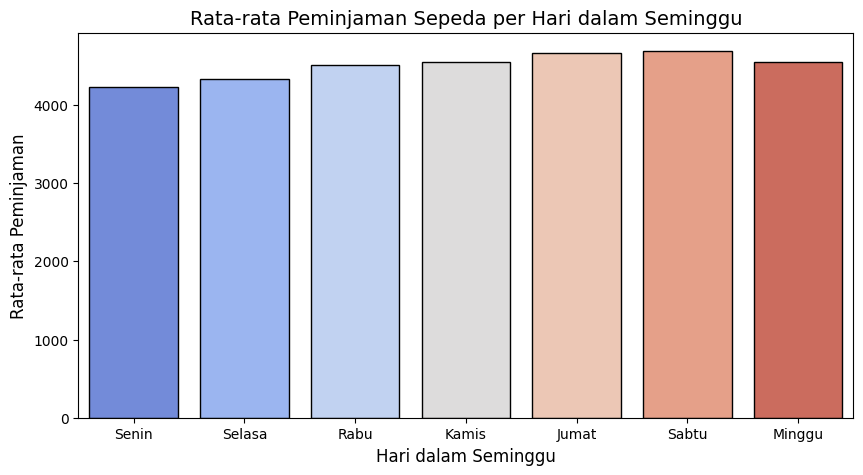

In [313]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_total_rentals.index, y=weekly_total_rentals.values, palette='coolwarm', edgecolor='black')

plt.title('Rata-rata Peminjaman Sepeda per Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.xticks(rotation=0)

plt.show()

**insight**
- Hari dengan peminjaman tertinggi terjadi pada hari Sabtu & hari Jumat yang  memiliki rata-rata peminjaman tertinggi.
- Hari dengan peminjaman terendah terjadi pada hari Senin yang memiliki rata-rata peminjaman yang sedikit lebih rendah dibandingkan hari lainnya.
- Pola umum yang terjadi menunjukan tidak ada perbedaan yang mencolok antara hari kerja dan akhir pekan, ini menunjukan bahwa sepeda digunakan secara konsisten sepanjang minggu.

## Conclusion

- Conclution pertanyaan 1
  1. Rata-rata peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.
Namun, cuaca juga berpengaruh signifikan terhadap jumlah peminjaman.
  2. Saat cuaca cerah, jumlah peminjaman lebih tinggi dibandingkan saat hujan atau mendung.
  3. Korelasi menunjukkan bahwa cuaca (-0.31) lebih memengaruhi peminjaman dibandingkan hari kerja/libur (0.06).
  - `Berdasarkan ketiga poin di atas, dapat disimpulkan bahwa cuaca lebih berdampak pada jumlah peminjaman dibandingkan status hari kerja/libur.`

- Conclution pertanyaan 2
  1. Hari kerja memiliki jumlah peminjaman lebih tinggi dibandingkan hari libur.
  2. Sistem lebih efektif digunakan di hari kerja, yang menunjukkan bahwa layanan ini lebih sering dimanfaatkan oleh pekerja atau mahasiswa untuk transportasi harian.
  3. Hari libur tetap memiliki peminjaman yang signifikan, tetapi lebih rendah dibanding hari kerja.
  - `Berdasarkan tiga poin di atas didapatkan hasil bahwa sistem bike-sharing lebih efektif untuk pengguna harian di hari kerja dibandingkan rekreasi di hari libur.`

- Conclution pertanyaan 3
  1. Pengguna Registered (Terdaftar)
    - Peminjaman sepeda meningkat dari Senin hingga Jumat, dengan puncak pada Kamis dan Jumat (sekitar 4000-an).
    - Pada akhir pekan (Sabtu & Minggu), peminjaman turun secara signifikan.
    - Data ini menunjukkan bahwa pengguna registered menggunakan sepeda sebagai alat transportasi utama selama hari kerja (misalnya untuk ke kantor atau kampus).

  2. Pengguna Casual (Tidak Terdaftar)
    - Peminjaman sepeda justru menurun drastis selama hari kerja, terutama pada Selasa hingga Jumat di bawah 600-an.
    - Jumlah peminjaman naik kembali pada Sabtu & Minggu, dengan puncak pada Minggu (sekitar 1500-an).
    - Data ini menunjukkan bahwa pengguna casual lebih sering menggunakan sepeda untuk rekreasi atau aktivitas santai di akhir pekan.
  
  - `Registered Users lebih aktif pada hari kerja, kemungkinan besar untuk transportasi sehari-hari.` dan `Casual Users lebih aktif di akhir pekan, kemungkinan besar untuk rekreasi atau perjalanan santai.`

- Conclution Pertanyaan 4
  - Berdasarkan hasil visualisasi didapatkan `hari dengan peminjaman tertinggi: Sabtu & Jumat memiliki rata-rata peminjaman tertinggi.`

## Tambahan


In [314]:
!pip install pipreqs
!pipreqs /content --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt


In [315]:
!cat /content/requirements.txt
